In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats

In [2]:
data=pd.read_csv('T Salary Survey EU 2019.csv')
data.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [3]:
data.describe()

,Age,Years of experience,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,0
count,882.000000,991.000000,990.000000,530.000000,203.000000,603.000000,257.000000,139.000000,931.000000,639.000000,0.0
mean,32.416100,8.529768,72562.212121,7857.169811,18263.119803,65803.895522,8144.000000,8204.476331,27.924812,6.462050,NaN
std,5.262496,5.036320,23947.379182,10320.628344,61012.387773,20554.017614,15067.876701,45224.397374,4.482911,15.384601,NaN
min,20.000000,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,NaN
25%,29.000000,5.000000,60000.000000,300.000000,1.000000,55000.000000,1000.000000,0.000000,26.000000,2.000000,NaN
50%,32.000000,8.000000,70000.000000,5000.000000,2000.000000,65000.000000,5000.000000,0.100000,28.000000,4.000000,NaN
75%,35.000000,11.000000,80000.000000,10000.000000,20000.000000,75000.000000,9000.000000,3000.000000,30.000000,7.000000,NaN
max,54.000000,30.000000,216000.000000,80000.000000,750000.000000,200000.000000,150000.000000,520000.000000,100.000000,365.000000,NaN


In [4]:
data.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                     109
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                          15
Position (without seniority)                                                                              1
Years of experience                                                                                       0
Your main technology / programming language                                                              14
Yearly brutto salary (without bonus and stocks)                                                           1
Yearly bonus                

In [5]:
data.describe(include='O')

,Zeitstempel,Gender,City,Seniority level,Position (without seniority),Your main technology / programming language,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector
count,991,991,991,976,990,977,986,257,977,960,962,846
unique,991,2,76,6,51,42,11,220,5,7,6,52
top,02.12.2019 11:18:26,Male,Berlin,Senior,Backend Developer,Python,English,Zalando,100-1000,Product,unlimited,Сommerce
freq,1,838,430,587,253,205,753,7,366,619,851,205


<AxesSubplot:xlabel='Seniority level', ylabel='Years of experience'>

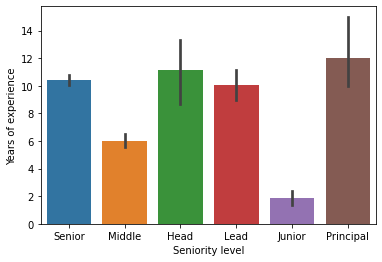

In [6]:
sns.barplot(x='Seniority level',y='Years of experience',data=data)

From the above bar plot, it seems like Junior has mean years of experience of 2 years;Middle as mean years of experience of 6 years and so on. so lets fill null values according to the Seniority level

In [7]:
data.loc[(data['Seniority level'].isnull())&(data['Years of experience']<=2),'Seniority level']='Junior'
data.loc[(data['Seniority level'].isnull())&(data['Years of experience']<=6),'Seniority level']='Middle'
data.loc[(data['Seniority level'].isnull())&(data['Years of experience']<=10),'Seniority level']='Senior'
data.loc[(data['Seniority level'].isnull())&(data['Years of experience']>10),'Seniority level']='Principal'

<AxesSubplot:xlabel='Seniority level', ylabel='Years of experience'>

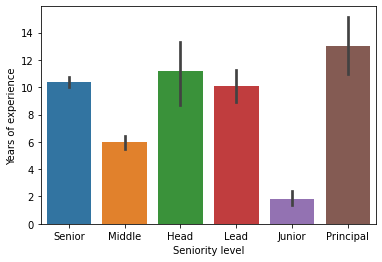

In [8]:
sns.barplot(x='Seniority level',y='Years of experience',data=data)

<AxesSubplot:xlabel='Seniority level', ylabel='Age'>

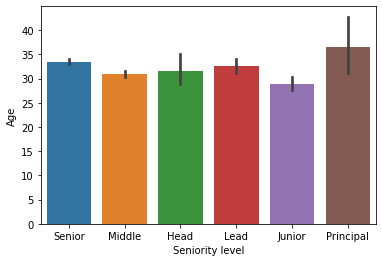

In [9]:
sns.barplot(x='Seniority level',y='Age',data=data)

In [10]:
print(data['Age'][data['Seniority level']=='Senior'].mean())
print(data['Age'][data['Seniority level']=='Middle'].mean())
print(data['Age'][data['Seniority level']=='Head'].mean())
print(data['Age'][data['Seniority level']=='Lead'].mean())
print(data['Age'][data['Seniority level']=='Junior'].mean())
print(data['Age'][data['Seniority level']=='Principal'].mean())

33.541425818882466
31.015625
31.6
32.55555555555556
28.9
36.6


The average age of Senior,middle,head,lead,junior and Principal are 29,32,33,31,32,37 respectively.

In [11]:
data.loc[(data['Age'].isnull())&(data['Seniority level']=='Junior'),'Age']=29
data.loc[(data['Age'].isnull())&(data['Seniority level']=='Lead'),'Age']=32
data.loc[(data['Age'].isnull())&(data['Seniority level']=='Senior'),'Age']=33
data.loc[(data['Age'].isnull())&(data['Seniority level']=='Middle'),'Age']=31
data.loc[(data['Age'].isnull())&(data['Seniority level']=='Head'),'Age']=32
data.loc[(data['Age'].isnull())&(data['Seniority level']=='Principal'),'Age']=37

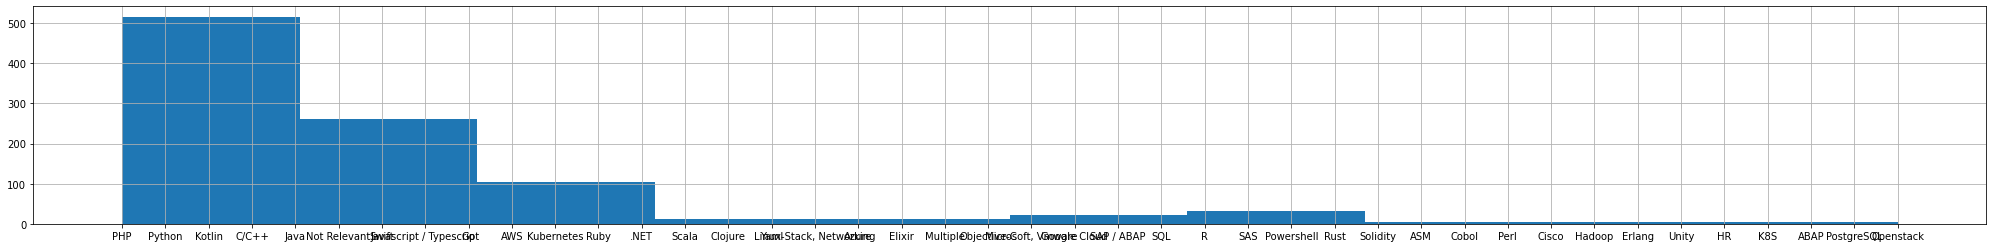

In [12]:
data['Your main technology / programming language'].hist(figsize=(35,4))
plt.show()

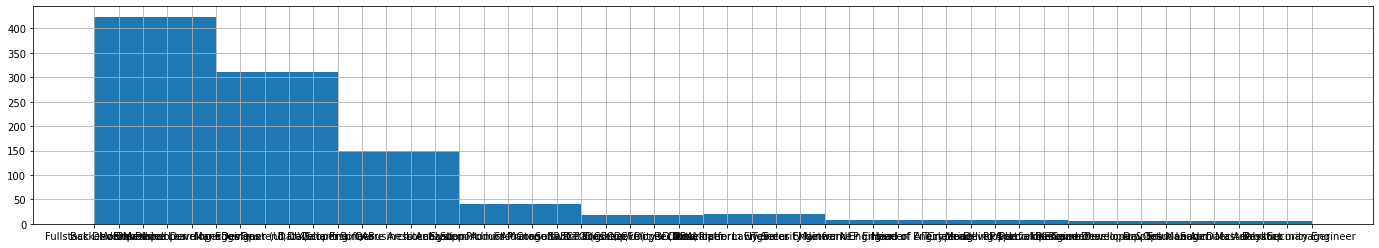

In [13]:
data['Position (without seniority)'].hist(figsize=(24,4))
plt.show()

In [14]:
data.loc[data['Position (without seniority)'].isnull()]

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
246,02.12.2019 21:11:52,33.0,Male,Munich,Senior,NaN,7,NaN,63500.0,7000.0,...,NaN,NaN,NaN,English,NaN,1000+,Product,unlimited,NaN,NaN


the position has only one null value so it will be fair if we fill it by the value with highest frequence i.e. Backend Developer

In [15]:
data.loc[(data['Position (without seniority)'].isnull()),'Position (without seniority)']='Backend Developer'#Filling Null Position

In [16]:
data['Your main technology / programming language'][(data['Position (without seniority)']=='Designer (UI, UX)')]
#data.loc[(data['Age'].isnull())&(data['Seniority level']=='Junior'),'Age']=29


13     Not Relevant
56              NaN
132    Not Relevant
289    Not Relevant
Name: Your main technology / programming language, dtype: object

In [17]:
data.loc[data['Your main technology / programming language'].isnull()]

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
56,02.12.2019 12:07:58,31.0,Female,MA,Senior,"Designer (UI, UX)",10,NaN,61000.0,NaN,...,NaN,30.0,6.0,Deutsch,NaN,10-50,Product,unlimited,Health,NaN
93,02.12.2019 13:30:29,31.0,Female,Berlin,Middle,Product Manager,3,NaN,60000.0,NaN,...,NaN,26.0,NaN,English,NaN,50-100,Startup,NaN,NaN,NaN
94,02.12.2019 13:33:23,27.0,Male,Berlin,Middle,Manager,2,NaN,52000.0,NaN,...,NaN,27.0,2.0,English,NaN,100-1000,Product,unlimited,Education,NaN
138,02.12.2019 15:19:47,34.0,Male,Munich,Senior,QA,12,NaN,64000.0,5000.0,...,NaN,30.0,4.0,Deutsch,NaN,1000+,Product,unlimited,Entertainment,NaN
168,02.12.2019 16:05:20,29.0,Male,Berlin,Senior,DevOps,10,NaN,70000.0,NaN,...,NaN,25.0,NaN,English,NaN,100-1000,Startup,unlimited,NaN,NaN
227,02.12.2019 19:59:25,25.0,Female,Munich,Junior,Manager,1,NaN,43200.0,10100.0,...,NaN,26.0,NaN,Deutsch,NaN,1000+,Consulting / Agency,unlimited,Logistics,NaN
246,02.12.2019 21:11:52,33.0,Male,Munich,Senior,Backend Developer,7,NaN,63500.0,7000.0,...,NaN,NaN,NaN,English,NaN,1000+,Product,unlimited,NaN,NaN
250,02.12.2019 21:45:06,27.0,Female,Nuremberg,Middle,Business Analyst,5,NaN,42000.0,NaN,...,NaN,25.0,1.0,English,NaN,1000+,Product,unlimited,Software Development,NaN
310,03.12.2019 11:09:14,33.0,Male,Frankfurt,Senior,Lawyer,7,NaN,170000.0,20000.0,...,10.0,NaN,0.0,English,NaN,100-1000,Consulting / Agency,unlimited,Finance / Insurance,NaN
524,05.12.2019 07:41:29,30.0,Female,Berlin,Junior,QA,1,NaN,34000.0,2000.0,...,NaN,30.0,NaN,English,NaN,10-50,Startup,unlimited,Finance / Insurance,NaN


lets fill the null value of programming langagauge with reference to his/her position

In [18]:
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='Designer (UI, UX)'),'Your main technology / programming language']='Not Relevant'

In [19]:
data['Your main technology / programming language'][(data['Position (without seniority)']=='Fullstack Developer')].mode()


0    Java
Name: Your main technology / programming language, dtype: object

In [20]:
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='Fullstack Developer'),'Your main technology / programming language']='Java'

In [21]:
data['Your main technology / programming language'][(data['Position (without seniority)']=='Backend Developer')].mode()


0    Java
Name: Your main technology / programming language, dtype: object

In [22]:
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='Backend Developer'),'Your main technology / programming language']='Java'

In [23]:
print('Product manager:'+data['Your main technology / programming language'][(data['Position (without seniority)']=='Product Manager')].mode())
print('Manager:'+data['Your main technology / programming language'][(data['Position (without seniority)']=='Manager')].mode())
print('QA: '+data['Your main technology / programming language'][(data['Position (without seniority)']=='QA')].mode())
print('DevOps:'+data['Your main technology / programming language'][(data['Position (without seniority)']=='DevOps')].mode())
print('Business Analyst:'+data['Your main technology / programming language'][(data['Position (without seniority)']=='Business Analyst')].mode())
print('Lawyer:'+data['Your main technology / programming language'][(data['Position (without seniority)']=='Lawyer')].mode())
print('Database Developer (DBA):'+data['Your main technology / programming language'][(data['Position (without seniority)']=='Database Developer (DBA)')].mode())
print('UX Researcher:'+data['Your main technology / programming language'][(data['Position (without seniority)']=='UX Researcher')].mode())

0    Product manager:Not Relevant
Name: Your main technology / programming language, dtype: object
0    Manager:Not Relevant
Name: Your main technology / programming language, dtype: object
0    QA: Java
Name: Your main technology / programming language, dtype: object
0    DevOps:AWS
Name: Your main technology / programming language, dtype: object
0    Business Analyst:Not Relevant
Name: Your main technology / programming language, dtype: object
Series([], Name: Your main technology / programming language, dtype: object)
0    Database Developer (DBA):SQL
Name: Your main technology / programming language, dtype: object
Series([], Name: Your main technology / programming language, dtype: object)


In [24]:
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='Product Manager'),'Your main technology / programming language']='Not Relevant'
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='Manager'),'Your main technology / programming language']='Not Relevant'
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='QA'),'Your main technology / programming language']='Java'
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='DevOps'),'Your main technology / programming language']='AWS'
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='Business Analyst'),'Your main technology / programming language']='Not Relevant'
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='Lawyer'),'Your main technology / programming language']='Not Relevant'
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='Database Developer (DBA)'),'Your main technology / programming language']='SQL'
data.loc[(data['Your main technology / programming language'].isnull())&(data['Position (without seniority)']=='UX Researcher'),'Your main technology / programming language']='Not Relevant'
data['Your main technology / programming language'].fillna('Not Relevant',inplace=True)

In [25]:
data.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                       0
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                           0
Position (without seniority)                                                                              0
Years of experience                                                                                       0
Your main technology / programming language                                                               0
Yearly brutto salary (without bonus and stocks)                                                           1
Yearly bonus                

In [26]:
data.loc[data['Yearly brutto salary (without bonus and stocks)'].isnull()]

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
475,04.12.2019 19:19:26,29.0,Male,Hamburg,Junior,Backend Developer,18,Python,NaN,NaN,...,NaN,NaN,NaN,English,NaN,1000+,Product,unlimited,Agriculture,NaN


Yearly brutto salary has one null value so we cam fill with the help of Seniority level and position

In [27]:
data['Yearly brutto salary (without bonus and stocks)'][(data['Seniority level']=='Junior') & (data['Position (without seniority)']=='Backend Developer')].mean()

48587.5

In [28]:
data['Yearly brutto salary (without bonus and stocks)'].fillna(48587.5,inplace=True)

In [29]:
data['Yearly bonus'].fillna(0,inplace=True)
data['Yearly stocks'].fillna(0,inplace=True)
data['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'].fillna(0,inplace=True)
data['Yearly bonus one year ago. Only answer if staying in same country'].fillna(0,inplace=True)
data['Yearly stocks one year ago. Only answer if staying in same country'].fillna(0,inplace=True)

In [30]:
data.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                       0
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                           0
Position (without seniority)                                                                              0
Years of experience                                                                                       0
Your main technology / programming language                                                               0
Yearly brutto salary (without bonus and stocks)                                                           0
Yearly bonus                

In [31]:
a=(data['Number of vacation days'][(data['Position (without seniority)']=='Fullstack Developer')].mean())
b=(data['Number of vacation days'][(data['Position (without seniority)']=='Backend Developer')].mean())
c=(data['Number of vacation days'][(data['Position (without seniority)']=='Product Manager')].mean())
d=(data['Number of vacation days'][(data['Position (without seniority)']=='Manager')].mean())
e=(data['Number of vacation days'][(data['Position (without seniority)']=='DevOps')].mean())
f=(data['Number of vacation days'][(data['Position (without seniority)']=='Frontend Developer')].mean())
g=(data['Number of vacation days'][(data['Position (without seniority)']=='Data Scientist')].mean())
h=(data['Number of vacation days'][(data['Position (without seniority)']=='Data Engineer')].mean())
meanVacation=(a+b+c+d+e+f+g+h)/8
meanVacation

27.98639853222035

null values of Number of vacation days can be filled by the average vacation of those position who has high weights

In [32]:
data['Number of vacation days'].fillna(28,inplace=True)

In [33]:
data.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                       0
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                           0
Position (without seniority)                                                                              0
Years of experience                                                                                       0
Your main technology / programming language                                                               0
Yearly brutto salary (without bonus and stocks)                                                           0
Yearly bonus                

In [34]:
a=(data['Number of home office days per month'][(data['Position (without seniority)']=='Fullstack Developer')].mean())
b=(data['Number of home office days per month'][(data['Position (without seniority)']=='Backend Developer')].mean())
c=(data['Number of home office days per month'][(data['Position (without seniority)']=='Product Manager')].mean())
d=(data['Number of home office days per month'][(data['Position (without seniority)']=='Manager')].mean())
e=(data['Number of home office days per month'][(data['Position (without seniority)']=='DevOps')].mean())
f=(data['Number of home office days per month'][(data['Position (without seniority)']=='Frontend Developer')].mean())
g=(data['Number of home office days per month'][(data['Position (without seniority)']=='Data Scientist')].mean())
h=(data['Number of home office days per month'][(data['Position (without seniority)']=='Data Engineer')].mean())
i=(data['Number of home office days per month'][(data['Position (without seniority)']=='Security Engineer')].mean())

meanHome=(a+b+c+d+e+f+g+h+i)/9

In [35]:
meanHome

6.760147836912543

In [36]:
data['Number of home office days per month'].fillna(6,inplace=True)

In [37]:
data['Company size'].unique()

array(['50-100', '10-50', '1000+', '100-1000', 'up to 10', nan],
      dtype=object)

In [38]:
data['Company size'].mode()

0    100-1000
Name: Company size, dtype: object

<AxesSubplot:xlabel='Company size', ylabel='Yearly brutto salary (without bonus and stocks)'>

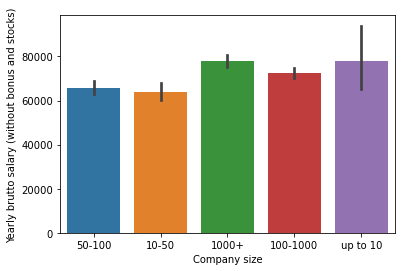

In [39]:
sns.barplot(x='Company size',y='Yearly brutto salary (without bonus and stocks)',data=data)

In [40]:
data['Company size'].fillna('100-1000',inplace=True)

In [41]:
data.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                       0
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                           0
Position (without seniority)                                                                              0
Years of experience                                                                                       0
Your main technology / programming language                                                               0
Yearly brutto salary (without bonus and stocks)                                                           0
Yearly bonus                

In [42]:
data['Main language at work'].unique()

array(['English', 'Deutsch', 'English+Deutsch', 'Russian', nan, 'Spanish',
       'French', 'Italian', 'Dutch', 'Polish+English', 'Polish',
       'Ukrainian'], dtype=object)

In [43]:
data['City'].unique()

array(['Berlin', 'Hamburg', 'Frankfurt', 'Munich', 'Cologne',
       'Düsseldorf', 'Wolfsburg', 'MA', 'Leipzig', 'Nuremberg', 'Krakow',
       'Prague', 'Wroclaw', 'Stuttgart', 'London', 'Karlsruhe',
       'Ingolstadt', 'Riga', 'Bern', 'Moscow', 'Darmstadt', 'Dusseldorf',
       'Kyiv', 'Freiburg', 'Amsterdam', 'Vienna', 'Pforzheim', 'Kassel ',
       'Madrid', 'Marburg', 'Warsaw', 'Hannover', 'Paris', 'Milan',
       'Odesa', 'Cork', 'Zug', 'Heidelberg', 'Brussels', 'Bielefeld',
       'Dublin', 'Jyvaskyla', 'Toulouse', 'Dubai', 'Zurich', 'Lingen',
       'Dresden', 'Lugano', 'Walldorf', 'Schleswig-Holstein',
       'Braunschweig', 'Kaiserslautern', 'Eindhoven', 'Saint Petersburg',
       'Eindhoven ', 'Leeuwarden', 'Hilversum', 'Gdańsk', 'Gothenburg',
       'Almere', 'Limassol', 'Stockholm', 'Tampere', 'Bayern',
       'Rotterdam', 'Antwerpen', 'Tallinn', 'Koblenz', 'Würzburg ',
       'Bremen', 'Lausanne', 'Nizhny Novgorod ', 'Saint-Petersburg ',
       'Minsk', 'Utrecht', 'Kiev']

991.0


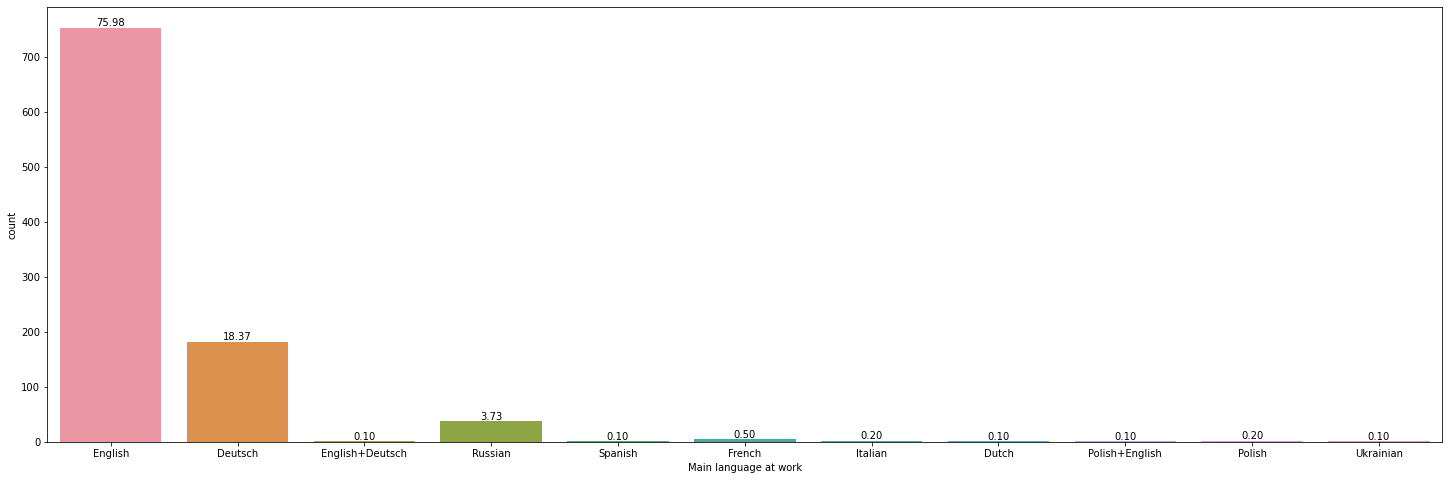

In [44]:
plt.figure(figsize=(25,8))

total=float(len(data['City']))
print(total)
ax=sns.countplot(x='Main language at work',data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:1.2f}'.format((height/total)*100),
            ha='center')
plt.show()

In [45]:
data['Main language at work'].fillna('English',inplace=True)

In [46]:
data.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                       0
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                           0
Position (without seniority)                                                                              0
Years of experience                                                                                       0
Your main technology / programming language                                                               0
Yearly brutto salary (without bonus and stocks)                                                           0
Yearly bonus                

In [47]:
data['Company type'].unique()

array(['Startup', 'Product', nan, 'Consulting / Agency',
       'Bodyshop / Outsource', 'University', 'Bank', 'Outsource'],
      dtype=object)

991.0


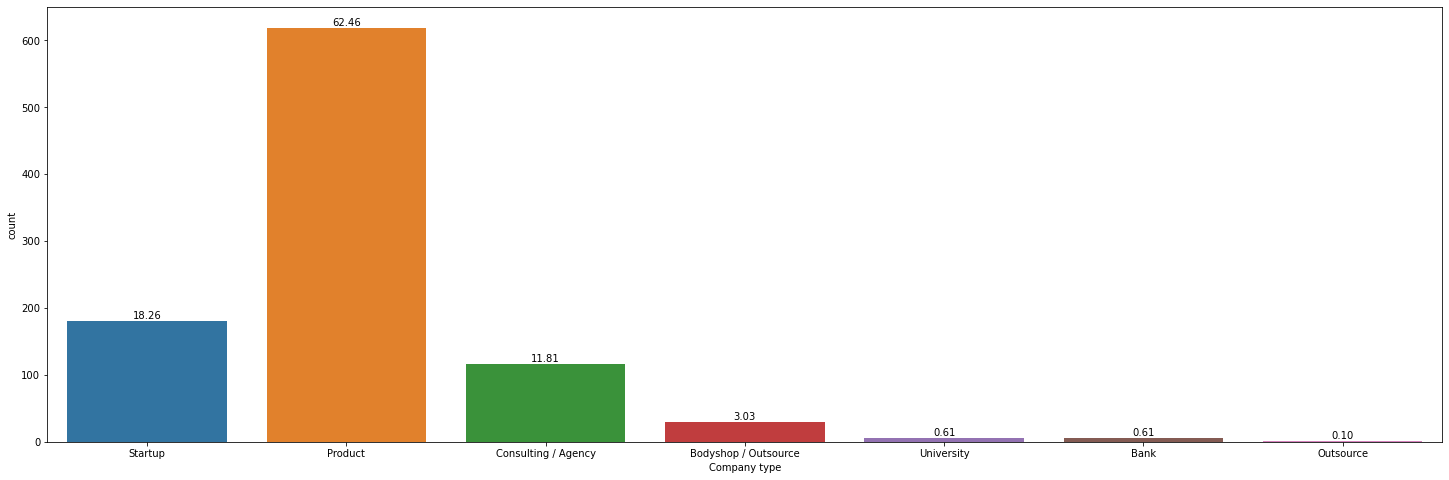

In [48]:
plt.figure(figsize=(25,8))

total=float(len(data['City']))
print(total)
ax=sns.countplot(x='Company type',data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:1.2f}'.format((height/total)*100),
            ha='center')
plt.show()

In [49]:
data['Company type'].fillna('Product',inplace=True)

In [50]:
data['Company business sector'].unique()

array(['Tourism', 'Scientific Activities', nan, 'Transport', 'Automotive',
       'Сommerce', 'Coaching ', 'Finance / Insurance', 'Gaming',
       'Manufacture', 'Customer Support', 'Advertising', 'Health',
       'Fashion', 'IoT', 'Catering', 'Marketing', 'IT', 'Education',
       'SEO', 'Сonstruction', 'Design', 'Software Development', 'Justice',
       'Logistics', 'Entertainment', 'Telecom', 'Media', 'Gambling',
       'Publishing', 'HR', 'Real Estate', 'Dating', 'Government',
       'Security', 'Agriculture', 'Energy', 'SAS', 'Cloud',
       'Nature Conservation', 'Software development', 'Internet portal',
       'Data Processing', 'Consulting', 'Mapping, Navigation',
       'Blockchain', 'Analytics ', 'End-to-end analytics', 'OTT',
       'embedded', 'FinTech', 'Food Retail', 'CRM systems integration'],
      dtype=object)

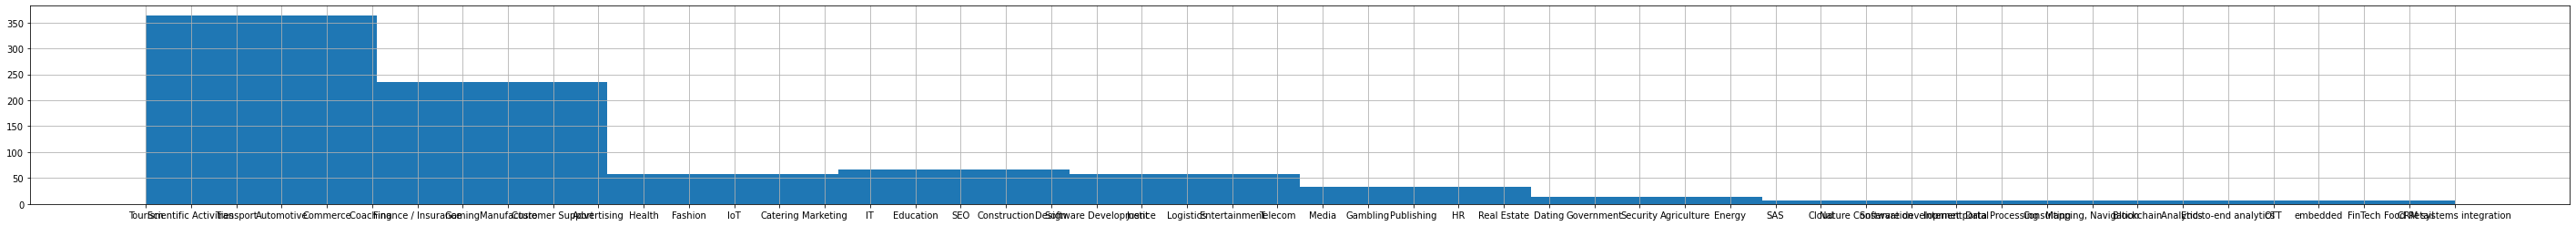

In [51]:
data['Company business sector'].hist(figsize=(50,4))
plt.show()

In [52]:
data['Company business sector'].value_counts().head(5)

Сommerce               205
Finance / Insurance    163
Transport               86
Manufacture             53
IT                      44
Name: Company business sector, dtype: int64

In [53]:
import random
data['Company business sector'].fillna(random.choice(['Commerce','Finance / Insurance']),inplace=True)

In [54]:
data.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                       0
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                           0
Position (without seniority)                                                                              0
Years of experience                                                                                       0
Your main technology / programming language                                                               0
Yearly brutto salary (without bonus and stocks)                                                           0
Yearly bonus                

In [55]:
data['Сontract duration'].value_counts().head(10)

unlimited             851
more than 1 year       59
1 year                 40
6 months                7
3 months                4
less than 3 months      1
Name: Сontract duration, dtype: int64

In [56]:
data['Сontract duration'].fillna('unlimited',inplace=True)

In [57]:
newData=data.drop(['0','Company name ','Zeitstempel'],axis='columns')

In [58]:
data['Company name ']

0         NaN
1         NaN
2         NaN
3       Auto1
4      Luxoft
        ...  
986       NaN
987       ING
988       SAP
989       NaN
990       NaN
Name: Company name , Length: 991, dtype: object

In [59]:
newData.isnull().sum()

Age                                                                                                     0
Gender                                                                                                  0
City                                                                                                    0
Seniority level                                                                                         0
Position (without seniority)                                                                            0
Years of experience                                                                                     0
Your main technology / programming language                                                             0
Yearly brutto salary (without bonus and stocks)                                                         0
Yearly bonus                                                                                            0
Yearly stocks                                 

# Visulization

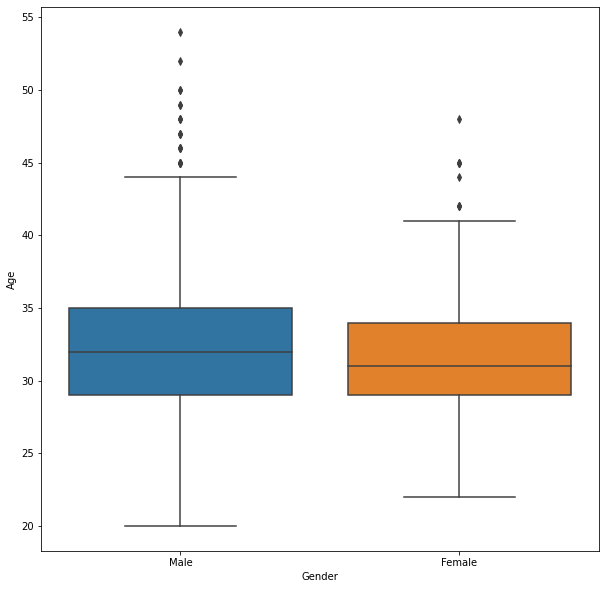

In [60]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x='Gender',y='Age',data=newData)
plt.show()

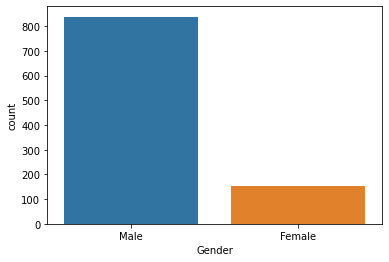

In [61]:
sns.countplot('Gender',data=newData)
plt.show()

In [62]:
pd.crosstab([newData['Seniority level']],newData.Gender).style.background_gradient('summer_r')

Gender,Female,Male
Seniority level,,
Head,0,6
Junior,32,42
Lead,0,35
Middle,65,209
Principal,0,6
Senior,56,540


In [63]:
pd.crosstab([newData['City']],newData.Gender).style.background_gradient('summer_r')

Gender,Female,Male
City,,
Almere,0,1
Amsterdam,9,71
Antwerpen,0,1
Bayern,1,0
Berlin,68,362
Bern,1,0
Bielefeld,0,1
Braunschweig,1,0
Bremen,0,1


In [64]:
pd.crosstab([newData['Position (without seniority)']],newData.Gender).style.background_gradient('summer_r')

Gender,Female,Male
Position (without seniority),,
Backend Developer,31,223
Backend Developer & Team Lead,0,1
Business Analyst,7,10
"CTO (CEO, CFO)",0,7
Cloud Platform Engineer,2,3
Crypto Developer,0,1
Data Analyst,0,1
Data Engineer,3,36
Data Scientist,29,93


In [65]:
pd.crosstab([newData['Your main technology / programming language']],newData.Age).style.background_gradient('summer_r')

Age,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000,52.000000,54.000000
Your main technology / programming language,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
.NET,0,0,0,0,3,2,0,2,0,3,2,0,2,7,4,4,2,2,0,1,0,2,1,1,1,1,0,1,0,0,0,0,0
ABAP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
ASM,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AWS,0,0,0,1,1,0,0,2,1,5,6,1,5,3,0,6,5,1,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0
Azure,0,0,1,0,0,0,0,0,0,0,2,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C/C++,0,0,0,0,2,1,0,0,2,2,0,1,4,6,6,5,0,5,3,0,3,1,1,0,0,1,0,1,0,0,0,0,0
Cisco,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
Clojure,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cobol,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Company size', ylabel='Yearly brutto salary (without bonus and stocks)'>

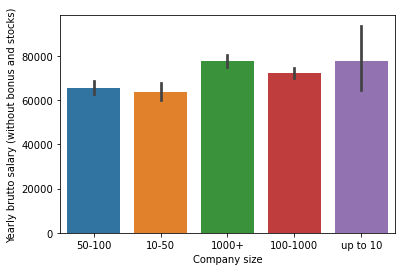

In [66]:
sns.barplot(x='Company size',y='Yearly brutto salary (without bonus and stocks)',data=data)

In [67]:
newData.loc[newData['Yearly bonus']==newData['Yearly bonus'].max()]

,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company size,Company type,Сontract duration,Company business sector
125,35.0,Male,Munich,Principal,Software Architect,15,Google Cloud,120000.0,80000.0,0.0,90000.0,10000.0,0.0,30.0,7.0,Deutsch,100-1000,Consulting / Agency,unlimited,Finance / Insurance
195,32.0,Female,Frankfurt,Senior,Recruiter,10,Not Relevant,56000.0,80000.0,0.0,36000.0,50000.0,0.0,24.0,4.0,English,100-1000,Consulting / Agency,unlimited,Software Development


In [68]:
newData.loc[newData['Yearly brutto salary (without bonus and stocks)']==newData['Yearly brutto salary (without bonus and stocks)'].max()]

,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company size,Company type,Сontract duration,Company business sector
499,33.0,Male,Zug,Senior,Backend Developer,12,Java,216000.0,47000.0,0.0,0.0,0.0,0.0,30.0,6.0,Deutsch,100-1000,Product,unlimited,Finance / Insurance


In [69]:
newData['Your main technology / programming language'].value_counts().head()

Python                     205
Java                       185
Not Relevant               126
Javascript / Typescript    107
PHP                         52
Name: Your main technology / programming language, dtype: int64

In [70]:
newData['Your main technology / programming language'][newData['Number of vacation days'].value_counts().head()]

339            .NET
223               R
126          Python
67           Python
60     Not Relevant
Name: Your main technology / programming language, dtype: object

# Hypothesis Test

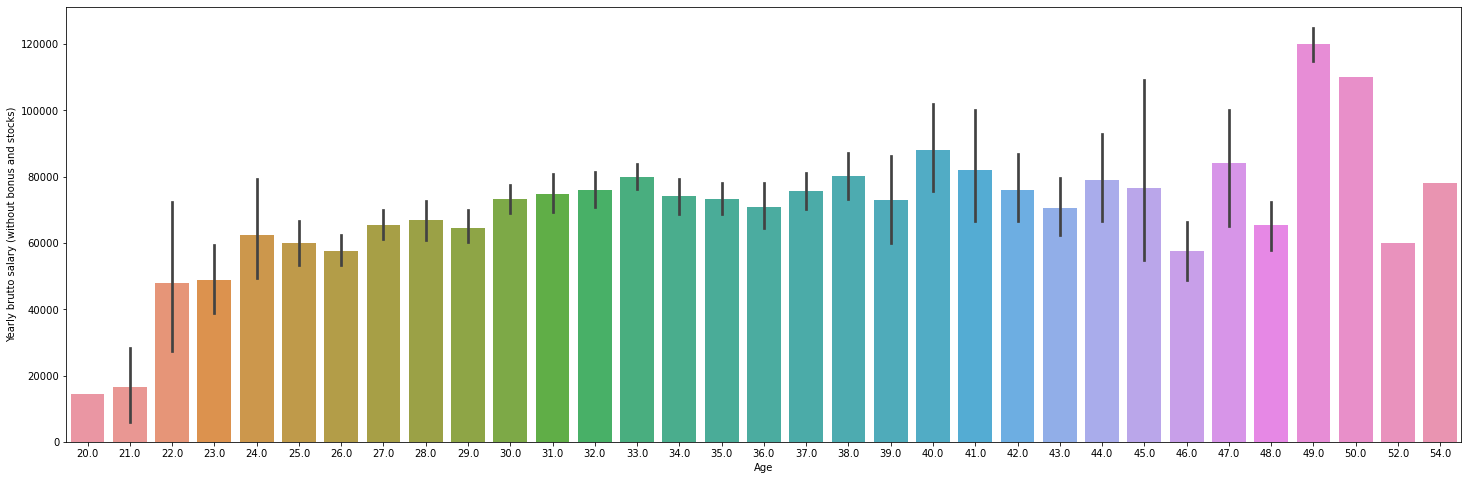

In [71]:
plt.figure(figsize=(25,8))
sns.barplot(x='Age',y='Yearly brutto salary (without bonus and stocks)',data=data)
plt.show()

In [72]:
t_value,p_value=stats.ttest_ind(data['Age'],data['Yearly brutto salary (without bonus and stocks)'])
if p_value<=0.05:
    print('We reject null hypothesis:Dependent')
else:
    print('We accept null hypothesis:Age and salary is independent')

We reject null hypothesis:Dependent


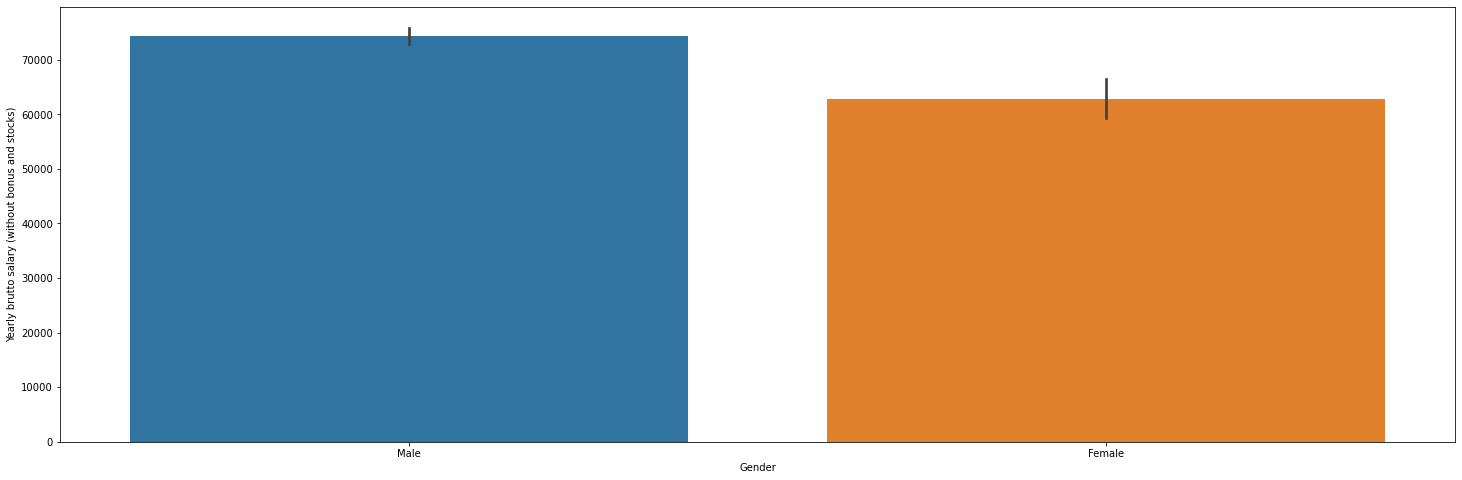

In [76]:
plt.figure(figsize=(25,8))
sns.barplot(x='Gender',y='Yearly brutto salary (without bonus and stocks)',data=data)
plt.show()

In [77]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [82]:
new=ols(newData['Yearly brutto salary (without bonus and stocks)'],newData['Gender']).fit()
an=sm.stats.anova_lm(new,typ=2)

PatsyError: model is missing required outcome variables